<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Ames Housing Price Prediction Project
## Regression Analysis
## Part 2: Models

**Model Selection**

In this section, the six models listed below will be used to train data saved from **'01_EDA_and_Cleaning'** notebook.

- Linear Regression
- Ridge
- Lasso
- Random Forest Regressor
- AdaBoost w Decision Tree Regressor
- Support Vector Machine Regressor

**Notebook Information**

Hyperparameter tuning is done in this notebook. To view the summary of the results, take a look at notebook **'03_Insights_and_Conclusions'**.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from joblib import load, dump

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression
from sklearn.svm import SVR
from sklearn import metrics

In [2]:
ames = pd.read_csv('datasets/ames_clean.csv')

pd.set_option('max_columns', None)
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice,Year Remod/Add Cats,Low Qual SF Cat,Garage Yr Blt Class,Porch Cat,Screen Porch Cat
0,60,RL,0.0,13517,Pave,None,IR,Lvl,CulDSac,Gtl,Sawyer,RR,Norm,1Fam,2Story,6,8,1976,Gable,CompShg,HdBoard,Plywood,HasMasVnr,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,Non,3,2010,WD,11.779129,Blt/Remod<10 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch
1,60,RL,43.0,11492,Pave,None,IR,Lvl,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,Gable,CompShg,VinylSd,VinylSd,HasMasVnr,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,Non,4,2009,WD,12.301383,Blt/Remod 10-20 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch
2,20,RL,68.0,7922,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,None,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,Non,1,2010,WD,11.599103,Blt/Remod<10 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch
3,60,RL,73.0,9802,Pave,None,Reg,Lvl,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,None,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,Non,4,2010,WD,12.066811,Blt/Remod<10 yrs,Finished,After 2000,No3SeasonPorch,NoScreenPorch
4,50,RL,82.0,14235,Pave,None,IR,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,None,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,Non,3,2010,WD,11.838626,Blt/Remod 10-20 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch


In [5]:
len(ames.columns)

74

**Convert Categorical Data to Dummy Variables**

In [5]:
ames = pd.get_dummies(ames, drop_first=True)
ames.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_None,Alley_Pave,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RR,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RR,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_NonCompShg,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_None,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Non,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Non,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_Non,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Non,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Non,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Non,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Year Remod/Add Cats_Blt/Remod<10 yrs,Year Remod/Add Cats_Blt/Remod>20 yrs,Low Qual SF Cat_UnfinishedSF<500,Low Qual SF Cat_UnfinishedSF>500,Garage Yr Blt Class_Before 2000,Garage Yr Blt Class_None,Porch Cat_No3SeasonPorch,Screen Porch Ca

In [6]:
ames.shape

(2045, 235)

- 2045 rows
- 235 columns including dummies

**Verify no null values**

In [7]:
pd.set_option('max_rows', None)
ames.isnull().sum()

MS SubClass                             0
Lot Frontage                            0
Lot Area                                0
Overall Qual                            0
Overall Cond                            0
Year Built                              0
Mas Vnr Area                            0
BsmtFin SF 1                            0
BsmtFin SF 2                            0
Bsmt Unf SF                             0
Total Bsmt SF                           0
1st Flr SF                              0
2nd Flr SF                              0
Gr Liv Area                             0
Bsmt Full Bath                          0
Bsmt Half Bath                          0
Full Bath                               0
Half Bath                               0
Bedroom AbvGr                           0
Kitchen AbvGr                           0
TotRms AbvGrd                           0
Fireplaces                              0
Garage Cars                             0
Garage Area                       

**Train Test Split**

In [41]:
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [43]:
X_train.shape

(1636, 234)

In [44]:
X_test.shape

(409, 234)

In [45]:
y_train.shape

(1636,)

In [46]:
y_test.shape

(409,)

**Standard Scaler**

In [14]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## Linear Regression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train_ss, y_train)

LinearRegression()

In [17]:
lr.score(X_train_ss, y_train)

0.9433633015417694

In [18]:
lr.score(X_test_ss, y_test)

-8.115026664875894e+16

A negative test score occurs when the sale price is set to the log of itself. To improve complexity of the model and reduce extreme overfitting, implement principal component analysis.

## Implement Principal Component Analysis
PCA is used to reduce the overfitting of a model by putting the data through a series of transformers where the first pass finds the most relevent, important data and subsequent transformers pick up the most relevent data from the data left over from the previous transformers. 

Using a pipeline with PCA scans a range of n_components, the number of transformers the data passes through, and applies the components to a model, in this case linear regression, and the gridsearch determines the best number of components that can generate the best test score.

In the following section, PCA is applied to linear regression, ridge and lasso and scores are compared to find the best performing model.

### PCA
Before implementing the pipeline, this looks at just the explained and cumulative variance of each of the PCA components where n_components is set to 100.

In [20]:
# Instantiate PCA.
pca = PCA(n_components=100)

In [21]:
# Fit PCA on the training data.
pca.fit(X_train_ss)

PCA(n_components=100)

In [22]:
# Transform PCA on the training data.
Z_train = pca.transform(X_train_ss)

In [23]:
# Transform Test
Z_test = pca.transform(X_test_ss)

In [24]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 100 components): {np.round(var_exp[:100], 3)}')

Explained variance (first 100 components): [0.073 0.037 0.031 0.026 0.023 0.021 0.018 0.015 0.013 0.013 0.012 0.012
 0.011 0.011 0.011 0.01  0.01  0.01  0.01  0.009 0.009 0.009 0.009 0.008
 0.008 0.008 0.008 0.008 0.008 0.008 0.007 0.007 0.007 0.007 0.007 0.007
 0.007 0.007 0.007 0.007 0.007 0.007 0.006 0.006 0.006 0.006 0.006 0.006
 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.003 0.003 0.003]


The first component is explaining 7.3% of the variability of this dataset. This dataset chose the most relevent data of the original set, and the second component pulled data from what was remaining. The remaining data no longer has the most important data from the set, so the explained variance is less at 3.7%. This process continues until the number of maximum components set in the instantiation stage is met, 100 in this case.

In [25]:
# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 100 components): {np.round(cum_var_exp[:100], 3)}')

Cumulative explained variance (first 100 components): [0.073 0.111 0.142 0.168 0.191 0.212 0.23  0.245 0.258 0.271 0.283 0.295
 0.306 0.317 0.327 0.337 0.348 0.358 0.367 0.377 0.386 0.395 0.404 0.412
 0.421 0.429 0.437 0.445 0.452 0.46  0.467 0.475 0.482 0.489 0.496 0.503
 0.51  0.517 0.524 0.531 0.537 0.544 0.55  0.556 0.563 0.569 0.575 0.581
 0.587 0.593 0.599 0.605 0.61  0.616 0.622 0.627 0.633 0.638 0.643 0.649
 0.654 0.659 0.664 0.669 0.674 0.679 0.684 0.689 0.694 0.699 0.703 0.708
 0.713 0.717 0.722 0.726 0.731 0.735 0.739 0.744 0.748 0.752 0.756 0.76
 0.764 0.768 0.772 0.776 0.78  0.784 0.788 0.791 0.795 0.799 0.802 0.806
 0.809 0.813 0.816 0.82 ]


The cumulative explained variance shows the cumulation of variance after every transformation. 100 iterations explains 82% of the variation of the principal components.

## Linear Regression on PCA data

In [26]:
lr_pca = LinearRegression()

In [27]:
lr_pca.fit(Z_train, y_train)

LinearRegression()

In [28]:
lr_pca.score(Z_train, y_train)

0.9095864624458199

In [29]:
lr_pca.score(Z_test, y_test)

0.8979209916402577

Woohoo! Recall that the original test score using linear regression was negative and completely overfit. Now, the test and training scores are closer to an equal accuracy. 

Running the PCA through a pipeline with linear regression will determine the optimal n_components that can maximize score and reduce unnecessary variance, also considered as noise.

## Linear Regression with PCA

Function made to accept different model and parameters.

In [54]:
def pipeline_func(model, param_grid, name=None):
    # model - input model to be instantiated
    # param_grid - gridsearch parameter
    # name - desired name of file input as string
    
    # Setup pipeline
    pipe = Pipeline([
    ('sc', StandardScaler()),
    ('pca', PCA()),
    ('model', model)
    ])
    
    # Set up gridsearch with 5 fold cross validation
    gs = GridSearchCV(estimator=pipe, param_grid=param_grid, cv = 5, verbose=1)
    
    # Fit gridsearch with X_train, y_train outside of function
    gs.fit(X_train, y_train)
    
    # Print scores to validate after cell completes
    print(gs.best_params_)
    print(gs.best_score_)
    print(gs.score(X_train, y_train), gs.score(X_test, y_test))
    
    # Save gridsearch results into dump file named after user input string
    dump(gs, name + '_pipe.dump')

In [58]:
# Set up parameters fo PCA to choose best number of components
param_grid = {
    'pca__n_components' : range(1, 220, 10)
}

pipeline_func(LinearRegression(), param_grid, name='lr_w_PCA')

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:   13.3s finished


{'pca__n_components': 181}
0.8980919085407025
0.937433486152454 0.9100702136384555


In [59]:
lr_pipe = load('lr_w_PCA_pipe.dump')

In [60]:
lr_pipe.best_params_

{'pca__n_components': 181}

#### Show which n_component value generates the best mean test score
Just as indicated in the best params feature of the gridsearch, 121 components generates the best mean test score as shown in the figure below.

In [52]:
df_gs = pd.DataFrame(lr_pipe.cv_results_)
df_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062468,0.010744,0.009066,0.000988,1,{'pca__n_components': 1},0.770230,0.688377,0.716327,0.749179,0.761409,0.737105,0.030463,20
1,0.056190,0.002300,0.008360,0.000051,11,{'pca__n_components': 11},0.866035,0.819437,0.839854,0.865307,0.885081,0.855143,0.022921,19
2,0.063504,0.005350,0.007503,0.001049,21,{'pca__n_components': 21},0.867828,0.829099,0.858893,0.879900,0.889249,0.864994,0.020709,18
3,0.057463,0.001717,0.007022,0.000984,31,{'pca__n_components': 31},0.873993,0.841582,0.857763,0.880422,0.890957,0.868943,0.017410,17
4,0.058669,0.001339,0.007080,0.001243,41,{'pca__n_components': 41},0.870942,0.846156,0.871931,0.885857,0.893002,0.873577,0.016060,16
5,0.069424,0.002988,0.008555,0.000429,51,{'pca__n_components': 51},0.872441,0.849437,0.877358,0.885620,0.899749,0.876921,0.016568,14
6,0.078757,0.004339,0.008632,0.001444,61,{'pca__n_components': 61},0.863597,0.850618,0.876850,0.884993,0.896170,0.874446,0.015965,15
7,0.085174,0.001983,0.008286,0.000589,71,{'pca__n_components': 71},0.866875,0.853647,0.888187,0.890181,0.898308,0.879440,0.016559,12
8,0.089486,0.003053,0.008357,0.000758,81,{'pca__n_components': 81},0.867484,0.856752,0.884177,0.889308,0.897548,0.879054,0.014864,13
9,0.093627,0.002224,0.007916,0.001261,91,{'pca__n_components': 91},0.870635,0.849438,0.884887,0.897259,0.900819,0.880608,0.018842,11


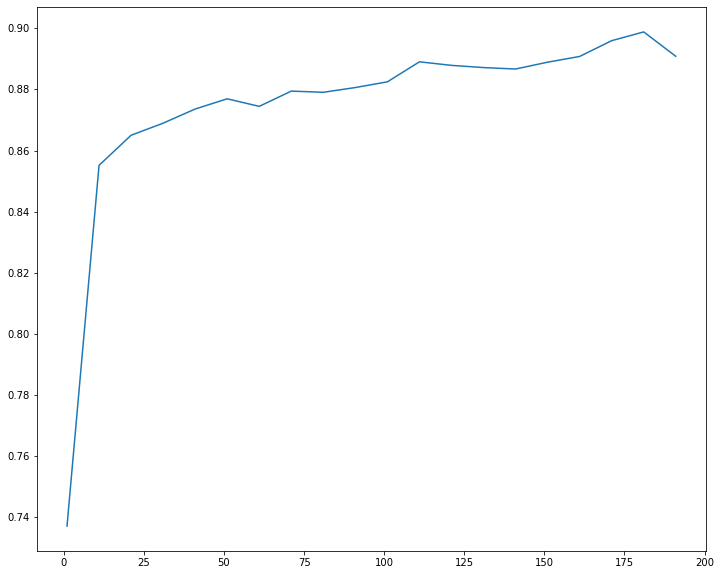

In [53]:
plt.figure(figsize=(12, 10))
plt.plot(df_gs['param_pca__n_components'], df_gs['mean_test_score']);

## Lasso
- save model

In [64]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
param_grid = {
    'pca__n_components' : range(1, 201, 10),
    'model__n_alphas' : [150, 200],
    'model__alphas' : [np.logspace(-5, 5, 1000)]
}

pipeline_func(LassoCV(), param_grid, name='lasso_w_PCA')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/juliatsaltas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02064479639934902, tolerance: 0.01855050281052635
  model = cd_fast.enet_coordinate_descent_gram(
/Users/juliatsaltas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021835552225550003, tolerance: 0.01855050281052635
  model = cd_fast.enet_coordinate_descent_gram(
/Users/juliatsaltas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023228597772696702, tolerance: 0.01855050

{'model__alphas': array([1.00000000e-05, 1.02331658e-05, 1.04717682e-05, 1.07159340e-05,
       1.09657929e-05, 1.12214777e-05, 1.14831241e-05, 1.17508713e-05,
       1.20248614e-05, 1.23052400e-05, 1.25921561e-05, 1.28857621e-05,
       1.31862140e-05, 1.34936714e-05, 1.38082977e-05, 1.41302599e-05,
       1.44597292e-05, 1.47968806e-05, 1.51418933e-05, 1.54949504e-05,
       1.58562396e-05, 1.62259529e-05, 1.66042866e-05, 1.69914417e-05,
       1.73876240e-05, 1.77930439e-05, 1.82079168e-05, 1.86324631e-05,
       1.90669084e-05, 1.95114835e-05, 1.99664245e-05, 2.04319732e-05,
       2.09083769e-05, 2.13958887e-05, 2.18947676e-05, 2.24052787e-05,
       2.29276931e-05, 2.34622885e-05, 2.40093488e-05, 2.45691646e-05,
       2.51420335e-05, 2.57282597e-05, 2.63281547e-05, 2.69420371e-05,
       2.75702333e-05, 2.82130768e-05, 2.88709092e-05, 2.95440800e-05,
       3.02329468e-05, 3.09378757e-05, 3.16592411e-05, 3.23974263e-05,
       3.31528234e-05, 3.39258338e-05, 3.47168682e-05, 3.55

"eps=0.001,\n    n_alphas=100,\n    alphas=None,\n    fit_intercept=True,\n    normalize=False,\n    precompute='auto',\n    max_iter=1000,\n    tol=0.0001,\n    copy_X=True,\n    cv=None,\n    verbose=False,\n    n_jobs=None,\n    positive=False,\n    random_state=None,\n    selection='cyclic',"

In [65]:
lasso_pipe = load('lasso_w_PCA_pipe.dump')

In [68]:
lasso_pipe.best_params_

{'model__alphas': array([1.00000000e-05, 1.02331658e-05, 1.04717682e-05, 1.07159340e-05,
        1.09657929e-05, 1.12214777e-05, 1.14831241e-05, 1.17508713e-05,
        1.20248614e-05, 1.23052400e-05, 1.25921561e-05, 1.28857621e-05,
        1.31862140e-05, 1.34936714e-05, 1.38082977e-05, 1.41302599e-05,
        1.44597292e-05, 1.47968806e-05, 1.51418933e-05, 1.54949504e-05,
        1.58562396e-05, 1.62259529e-05, 1.66042866e-05, 1.69914417e-05,
        1.73876240e-05, 1.77930439e-05, 1.82079168e-05, 1.86324631e-05,
        1.90669084e-05, 1.95114835e-05, 1.99664245e-05, 2.04319732e-05,
        2.09083769e-05, 2.13958887e-05, 2.18947676e-05, 2.24052787e-05,
        2.29276931e-05, 2.34622885e-05, 2.40093488e-05, 2.45691646e-05,
        2.51420335e-05, 2.57282597e-05, 2.63281547e-05, 2.69420371e-05,
        2.75702333e-05, 2.82130768e-05, 2.88709092e-05, 2.95440800e-05,
        3.02329468e-05, 3.09378757e-05, 3.16592411e-05, 3.23974263e-05,
        3.31528234e-05, 3.39258338e-05, 3.47168

## Ridge
- save model as 'ridge_w_PCA_pipe.dump'

In [75]:
param_grid = {
    'pca__n_components' : range(1, 201, 10),
    'model__alphas' : [np.logspace(-5, 5, 1000)]
}

pipeline_func(RidgeCV(), param_grid, name='ridge_w_PCA')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


{'model__alphas': array([1.00000000e-05, 1.02331658e-05, 1.04717682e-05, 1.07159340e-05,
       1.09657929e-05, 1.12214777e-05, 1.14831241e-05, 1.17508713e-05,
       1.20248614e-05, 1.23052400e-05, 1.25921561e-05, 1.28857621e-05,
       1.31862140e-05, 1.34936714e-05, 1.38082977e-05, 1.41302599e-05,
       1.44597292e-05, 1.47968806e-05, 1.51418933e-05, 1.54949504e-05,
       1.58562396e-05, 1.62259529e-05, 1.66042866e-05, 1.69914417e-05,
       1.73876240e-05, 1.77930439e-05, 1.82079168e-05, 1.86324631e-05,
       1.90669084e-05, 1.95114835e-05, 1.99664245e-05, 2.04319732e-05,
       2.09083769e-05, 2.13958887e-05, 2.18947676e-05, 2.24052787e-05,
       2.29276931e-05, 2.34622885e-05, 2.40093488e-05, 2.45691646e-05,
       2.51420335e-05, 2.57282597e-05, 2.63281547e-05, 2.69420371e-05,
       2.75702333e-05, 2.82130768e-05, 2.88709092e-05, 2.95440800e-05,
       3.02329468e-05, 3.09378757e-05, 3.16592411e-05, 3.23974263e-05,
       3.31528234e-05, 3.39258338e-05, 3.47168682e-05, 3.55

In [76]:
ridge_pipe = load('ridge_w_PCA_pipe.dump')

In [77]:
ridge_pipe.best_params_

{'model__alphas': array([1.00000000e-05, 1.02331658e-05, 1.04717682e-05, 1.07159340e-05,
        1.09657929e-05, 1.12214777e-05, 1.14831241e-05, 1.17508713e-05,
        1.20248614e-05, 1.23052400e-05, 1.25921561e-05, 1.28857621e-05,
        1.31862140e-05, 1.34936714e-05, 1.38082977e-05, 1.41302599e-05,
        1.44597292e-05, 1.47968806e-05, 1.51418933e-05, 1.54949504e-05,
        1.58562396e-05, 1.62259529e-05, 1.66042866e-05, 1.69914417e-05,
        1.73876240e-05, 1.77930439e-05, 1.82079168e-05, 1.86324631e-05,
        1.90669084e-05, 1.95114835e-05, 1.99664245e-05, 2.04319732e-05,
        2.09083769e-05, 2.13958887e-05, 2.18947676e-05, 2.24052787e-05,
        2.29276931e-05, 2.34622885e-05, 2.40093488e-05, 2.45691646e-05,
        2.51420335e-05, 2.57282597e-05, 2.63281547e-05, 2.69420371e-05,
        2.75702333e-05, 2.82130768e-05, 2.88709092e-05, 2.95440800e-05,
        3.02329468e-05, 3.09378757e-05, 3.16592411e-05, 3.23974263e-05,
        3.31528234e-05, 3.39258338e-05, 3.47168

## Random Forest Regressor
- save model as 'rf_w_PCA_pipe.dump'

In [87]:
param_grid = {
    'pca__n_components' : range(1, 201, 10),
    'model__max_depth' : [2, 3],
    'model__n_estimators' : [50, 100, 150]
}

pipeline_func(RandomForestRegressor(), param_grid, name='rf_w_PCA')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  8.3min finished


{'model__max_depth': 3, 'pca__n_components': 41}
0.7677145073277588
0.7959513571085087 0.80046084753563


In [88]:
rf_pipe = load('rf_w_PCA_pipe.dump')

In [89]:
rf_pipe.best_params_

{'model__max_depth': 3, 'pca__n_components': 41}

## AdaBoost Regressor
- save model as 'adab_w_PCA_pipe.dump'
- use default base_model decision tree with max depth 3

In [96]:
param_grid = {
    'pca__n_components' : range(1, 201, 10),
    'model__n_estimators' : [50, 100]
}

pipeline_func(AdaBoostRegressor(), param_grid, name='adab_w_PCA')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.3min finished


{'model__n_estimators': 100, 'pca__n_components': 191}
0.7885102544958128
0.8481153174213845 0.8082447447993542


In [97]:
adab_pipe = load('adab_w_PCA_pipe.dump')

In [98]:
adab_pipe.best_params_

{'model__n_estimators': 100, 'pca__n_components': 191}

## SVR
- save model as 'svr_w_PCA_pipe.dump'

In [108]:
param_grid = {
    'pca__n_components' : range(1, 201, 10),
    'model__C' : [0.1, 1, 10, 100]
}

pipeline_func(SVR(), param_grid, name='svr_w_PCA')

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  2.1min finished


{'model__C': 1, 'pca__n_components': 11}
0.8534734750879454
0.9149680755603923 0.8869703660480073


In [109]:
svr_pipe = load('svr_w_PCA_pipe.dump')

In [110]:
svr_pipe.best_params_

{'model__C': 1, 'pca__n_components': 11}

### Save Train and Test Data

In [118]:
X_train.to_csv('datasets/X_train.csv', index=False)

In [119]:
X_test.to_csv('datasets/X_test.csv', index=False)

In [120]:
y_train.to_csv('datasets/y_train.csv', index=False)

In [121]:
y_test.to_csv('datasets/y_test.csv', index=False)

### Summary: Compare Model Results

In [116]:
summary = pd.DataFrame({ 'model' : ['best_score', 'train_score', 'test_score'],
    'lin_reg': [lr_pipe.best_score_, lr_pipe.score(X_train,y_train), lr_pipe.score(X_test,y_test)],
      'lasso': [lasso_pipe.best_score_, lasso_pipe.score(X_train,y_train), lasso_pipe.score(X_test,y_test)],
      'ridge': [ridge_pipe.best_score_, ridge_pipe.score(X_train,y_train), ridge_pipe.score(X_test,y_test)],
      'random_forest': [rf_pipe.best_score_, rf_pipe.score(X_train,y_train), rf_pipe.score(X_test,y_test)],
      'ada_boost': [adab_pipe.best_score_, adab_pipe.score(X_train,y_train), adab_pipe.score(X_test,y_test)],
      'svr': [svr_pipe.best_score_, svr_pipe.score(X_train,y_train), svr_pipe.score(X_test,y_test)]
})
                        

In [122]:
summary.T

,0,1,2
model,best_score,train_score,test_score
lin_reg,0.898092,0.937433,0.91007
lasso,0.900648,0.933649,0.916146
ridge,0.902431,0.933588,0.920468
random_forest,0.767715,0.795951,0.800461
ada_boost,0.78851,0.848115,0.808245
svr,0.853473,0.914968,0.88697
